In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
#read train & test dataset
df_train = pd.read_csv(r'/Users/aakanksha/Downloads/data_science_honors 2/data/titanic/train.csv') 
df_test = pd.read_csv(r'/Users/aakanksha/Downloads/data_science_honors 2/data/titanic/test_in.csv')

In [32]:
df_train.head(5)
print(df_train.shape)

(891, 12)


% of Male Survied : 25.796178343949045
% of Female Survied : 81.10918544194108


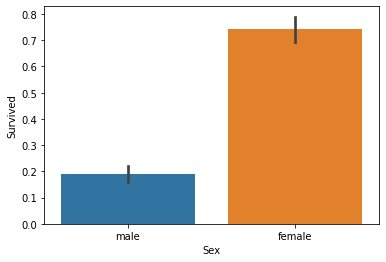

In [33]:
sns.barplot(x='Sex',y='Survived',data=df_train)
print("% of Male Survied :",df_train['Survived'][df_train['Sex']=='female'].value_counts(normalize=True)[0]*100)
print("% of Female Survied :",df_train['Survived'][df_train['Sex']=='male'].value_counts(normalize=True)[0]*100)


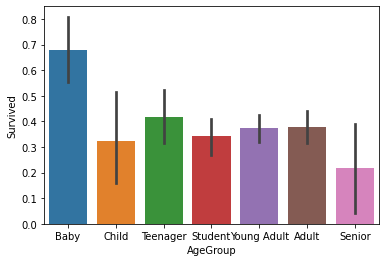

In [34]:
#fill null ages
df_train['Age']=df_train['Age'].interpolate()
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels = labels)


#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df_train)
plt.show()
#survival rate of babies is more

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


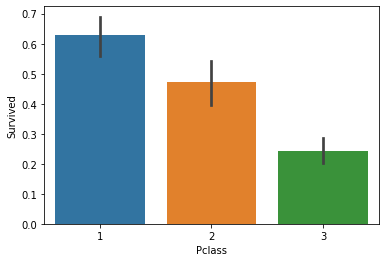

In [35]:
sns.barplot(x="Pclass", y="Survived", data=df_train)

#print percentage of people by Pclass that survived

print("Percentage of Pclass = 1 who survived:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)


In [36]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [37]:
#drop columns not needed
cols = ['PassengerId','Name', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','AgeGroup']
df_train = df_train.drop(cols,axis=1)

In [38]:
df_train.sample(5)

,Survived,Pclass,Sex,Age
66,1,2,female,29.0
332,0,1,male,38.0
112,0,3,male,22.0
375,1,1,female,12.5
200,0,3,male,28.0


In [39]:
df_train.shape

(891, 4)

In [40]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [41]:
#converting Pclass,Sex to dummy variables
#categorical to dummies
dummies = []
cols = ['Pclass', 'Sex']
for col in cols:
    dummies.append(pd.get_dummies(df_train[col]))
titanic_dummies = pd.concat(dummies, axis=1)
#final dataset
df = pd.concat((df_train,titanic_dummies), axis=1)
#drop orignal comuns from dataset
df = df.drop(['Pclass', 'Sex'], axis=1)

In [42]:
df.columns

Index(['Survived', 'Age', 1, 2, 3, 'female', 'male'], dtype='object')

In [43]:
#rename columns
df.rename(columns={1: "Pclass:1", 2: "Pclass:2",3:"Pclass:3"})

,Survived,Age,Pclass:1,Pclass:2,Pclass:3,female,male
0,0,22.0,0,0,1,0,1
1,1,38.0,1,0,0,1,0
2,1,26.0,0,0,1,1,0
3,1,35.0,1,0,0,1,0
4,0,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...
886,0,27.0,0,1,0,0,1
887,1,19.0,1,0,0,1,0
888,0,22.5,0,0,1,1,0
889,1,26.0,1,0,0,0,1


In [44]:
#seprate out target feature 
y = df['Survived'].values
X = df.values
X = np.delete(X,1,axis=1)

In [45]:
print("Target shape",y.shape)
print("Factors shape",X.shape)

Target shape (891,)
Factors shape (891, 6)


In [46]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=0)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

#built model
model = LogisticRegression()
#fit model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

100.0

In [48]:
# create param grid object 
forrest_params = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(10, 60, 10)],
)

In [49]:
# instantiate Random Forest model
model = RandomForestClassifier()

In [50]:
# build and fit model 
forest_cv = GridSearchCV(estimator=model,param_grid=forrest_params, cv=5) 
forest_cv.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11, 12, 13],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [51]:
print("Best score: {}".format(forest_cv.best_score_))
print("Optimal params: {}".format(forest_cv.best_estimator_))


Best score: 1.0
Optimal params: RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=10)


In [52]:
y_pred = forest_cv.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage


100.0

In [53]:
importances = forest_cv.best_estimator_.feature_importances_

In [54]:
print("Age :",importances[0])
print("Pclass:1",importances[1])
print("Pclass:2",importances[2])
print("Pclass:3",importances[3])
print("female:",importances[4])
print("male:",importances[5])

Age : 0.6986214671607636
Pclass:1 0.017815300946620198
Pclass:2 0.006646935455309834
Pclass:3 0.05508695116785324
female: 0.12972957752798392
male: 0.0920997677414693
